<h2><center><h1><center><font color='Red'> Bike <font color='Blue'> Share <font color='Green'> Assignement 

<h4><center> By <br><br>
Farooq Ahmed,MSc IBF(Liverpool JMU), MBA (City London), EPAT <br>
email <font color='Blue'>Farooqams@hotmail.com<font color='Blue'>

<h2><center> Oct 2021<br><br>

# Objective of the Assignement 

### The assignement required to model the demand for shared bikes with the available independent variables.
### The company management want to understand how exactly the demands vary with different features
### The assignement will requires to develop multi regression.  

### We will approach the problem by  assessing the significant drivers and identifying the problem by Pythonic way, reducing duplcating task. Where possible / applicable. 


# Import Library

We import following libraries 

In [1]:
%%time
import warnings
warnings.filterwarnings('ignore')

import datetime ## download to convert loan formating
import numpy as np 
import pandas as pd


import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

sns.set_style('white') 
sns.color_palette("rocket", as_cmap=True)
sns.light_palette("green", as_cmap=True)
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-bright')
%matplotlib inline

import os

# Disable limit of display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = "{:,.2f}".format ## This libary parameter is downloaded keep the loan in Notional Decimal.

from IPython.display import display, HTML

import colorama
from colorama import Fore, Style

from scipy.stats import norm

Wall time: 2.26 s


## Download  and Cleaning Data


We download the day.csv data

In [2]:
df= pd.read_csv('day.csv',encoding = "ISO-8859-1",parse_dates=True)

We check how many columns are there in the raw data.

In [3]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

We also check how the raw data is and analysis this. And, decides which items we need maniplate by dummpy variables or by scaling. 

In [4]:
display(df.head(10))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


The current data shape is 730 x 16 rows

In [5]:
df.shape

(730, 16)

The decribe data help use to understand the minimum and maximum

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


We check in the dataset characteristics , which will transformed 

## Dataset characteristics

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Preparation from the above characteristics

we will drop the non required features and update the categories from characteristics

In [7]:
df.drop(['instant','casual','registered'], axis = 1, inplace = True)
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth = df.mnth.replace({1: '01 jan',2: '02 feb',3: '03 mar',4: '04 apr',5: '05 may',6: '6 jun',
                  7: '07 jul',8: '08 aug',9: '09 sept',10: '10 oct',11: '11 nov',12: '12 dec'})
df.yr = df.yr.replace({0: '2018',1: '2019'})
df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

We re-check the data , after updating the features

In [8]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,01 jan,0,sat,0,moderate,14.11,18.18,80.58,10.75,985
1,02-01-2018,spring,2018,01 jan,0,sun,0,moderate,14.90,17.69,69.61,16.65,801
2,03-01-2018,spring,2018,01 jan,0,mon,1,good,8.05,9.47,43.73,16.64,1349
3,04-01-2018,spring,2018,01 jan,0,tue,1,good,8.20,10.61,59.04,10.74,1562
4,05-01-2018,spring,2018,01 jan,0,wed,1,good,9.31,11.46,43.70,12.52,1600


## EDA Univariate Analysis

we decided to run the EDA analysis to understand the data

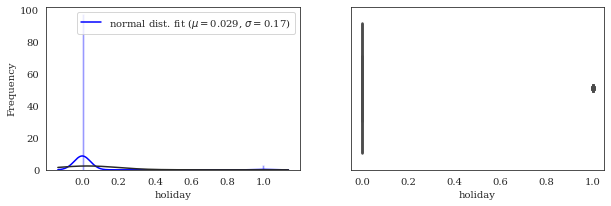

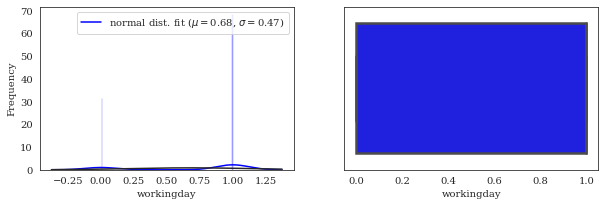

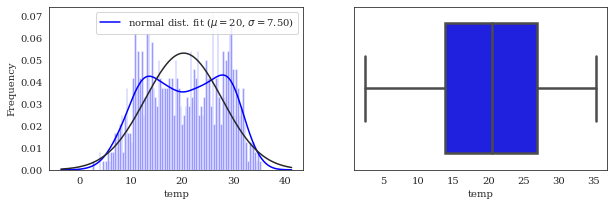

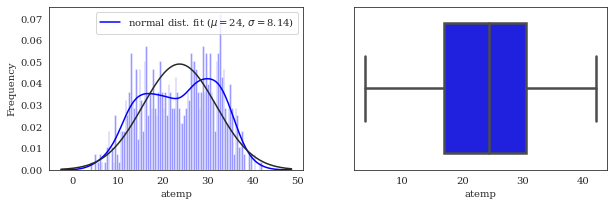

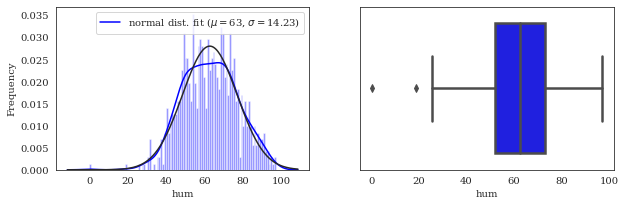

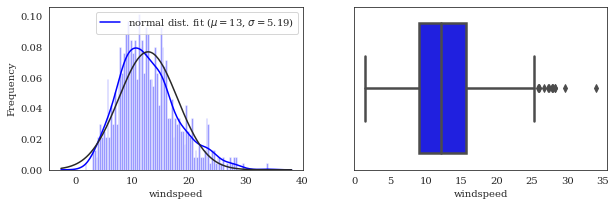

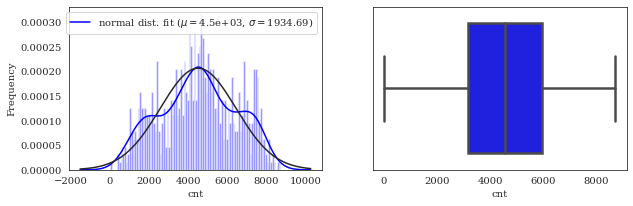

In [9]:
var = df.columns[1:]
for i in var:
    plt.figure(figsize=(10,3))
    try:
        plt.subplot(1,2,1)
        sns.distplot(a=df[i], bins=100,kde=True,color='blue', fit=norm)
        (mu, sigma) = norm.fit(df[i])
        plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
        plt.ylabel('Frequency')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i],color='blue',linewidth=2.5)
       
    except Exception:
        plt.close()
        pass 

plt.show()

we noted the result of distribution for 'cnt' follow normal distribution. 

In [11]:
df.pivot_table(values=i,index='yr',columns='mnth').round(1)

mnth,01 jan,02 feb,03 mar,04 apr,05 may,07 jul,08 aug,09 sept,10 oct,11 nov,12 dec,6 jun
yr,,,,,,,,,,,,
2018,"1,231.90","1,722.00","2,066.00","3,162.30","4,381.30","4,559.40","4,409.40","4,247.30","3,984.20","3,405.60","2,816.90","4,783.70"
2019,"3,120.80","3,618.00","5,318.50","5,807.50","6,318.20","6,568.00","6,919.50","7,285.80","6,414.20","5,088.80","3,990.70","6,761.00"


In [12]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,01 jan,0,sat,0,moderate,14.11,18.18,80.58,10.75,985
1,02-01-2018,spring,2018,01 jan,0,sun,0,moderate,14.90,17.69,69.61,16.65,801
2,03-01-2018,spring,2018,01 jan,0,mon,1,good,8.05,9.47,43.73,16.64,1349
3,04-01-2018,spring,2018,01 jan,0,tue,1,good,8.20,10.61,59.04,10.74,1562
4,05-01-2018,spring,2018,01 jan,0,wed,1,good,9.31,11.46,43.70,12.52,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,2019,12 dec,0,thu,1,moderate,10.42,11.33,65.29,23.46,2114
726,28-12-2019,spring,2019,12 dec,0,fri,1,moderate,10.39,12.75,59.00,10.42,3095
727,29-12-2019,spring,2019,12 dec,0,sat,0,moderate,10.39,12.12,75.29,8.33,1341
728,30-12-2019,spring,2019,12 dec,0,sun,0,good,10.49,11.59,48.33,23.50,1796


## Segmented Univariate Analysis by Year / Month

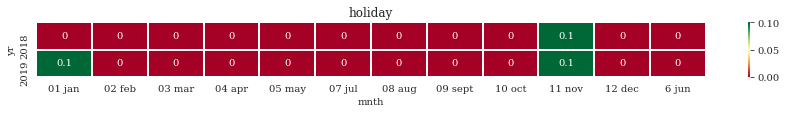

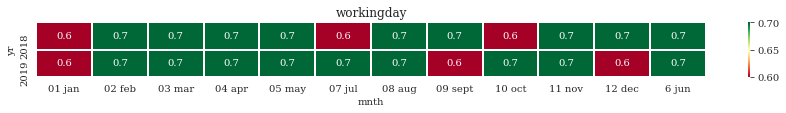

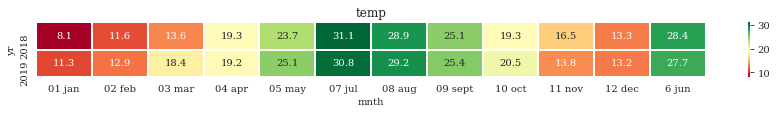

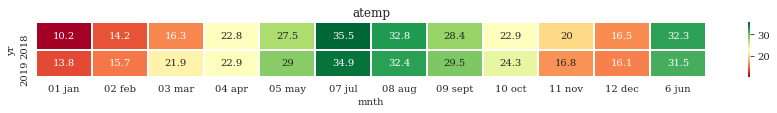

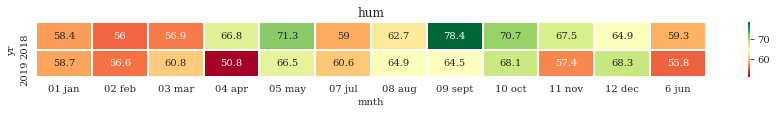

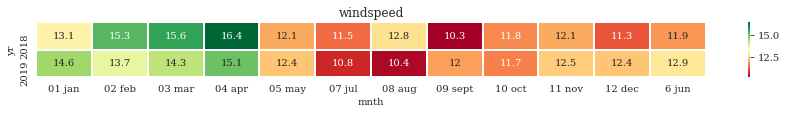

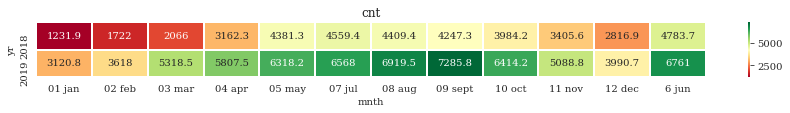

In [10]:
#var = ['loan_amnt']
var = df.columns[2:]
for i in var:
    plt.figure(figsize=(15,1))
    try:
        loanheat = df.pivot_table(values=i,index='yr',columns='mnth').round(1)
        #display(loanheat)
        sns.heatmap(loanheat,cmap='RdYlGn',linecolor='white',linewidths=1,annot=True,fmt='g')
        plt.title(str(i))
        plt.show()
    except Exception:
        plt.close()
        pass 


segmented univariate analysis for 'cnt' most of the customers appears in May to Oct~ and Dec each year, hence signifying that these months are important. 

### Bivariate analysis 

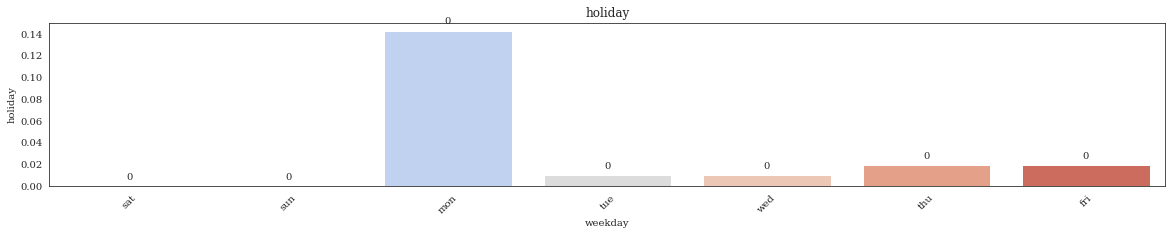

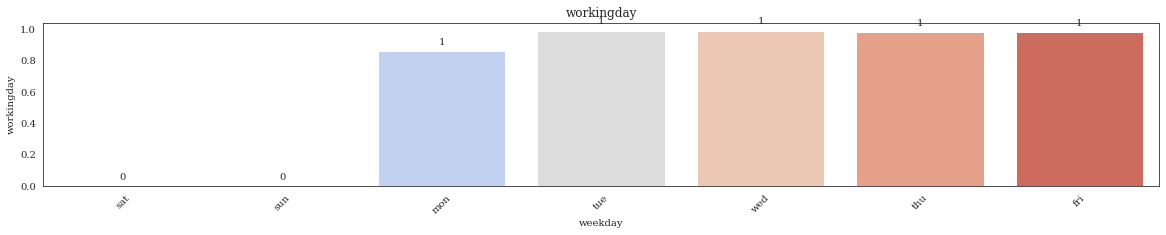

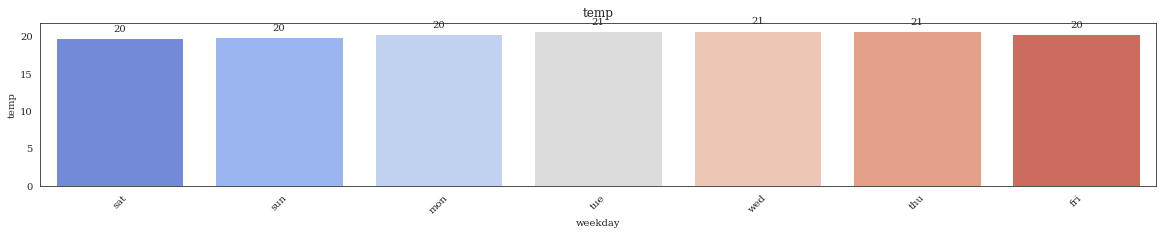

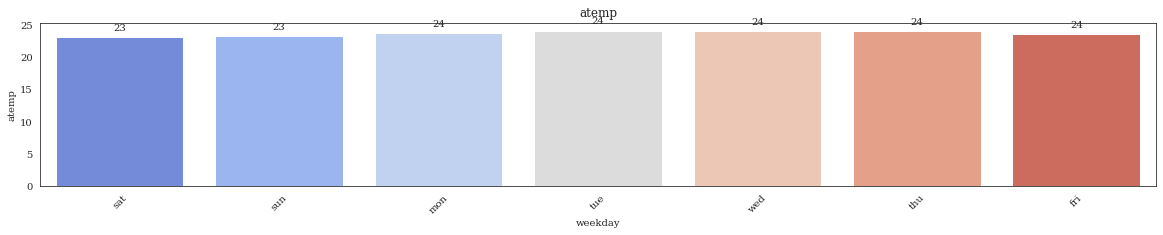

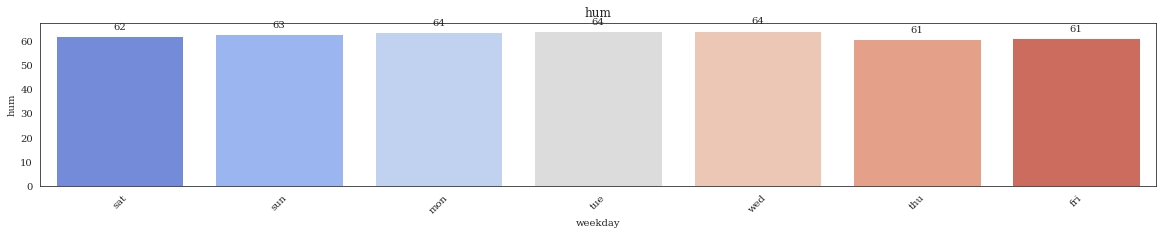

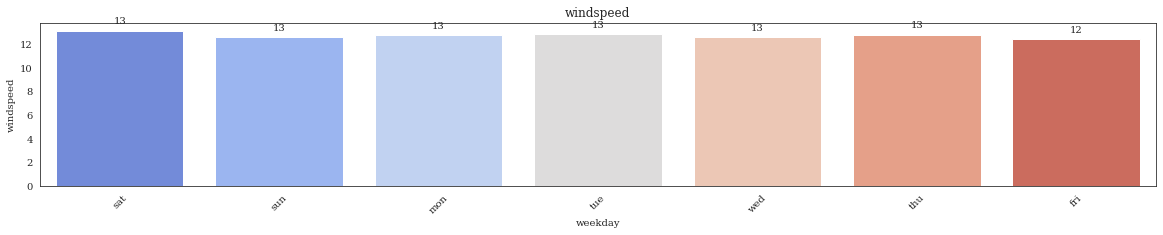

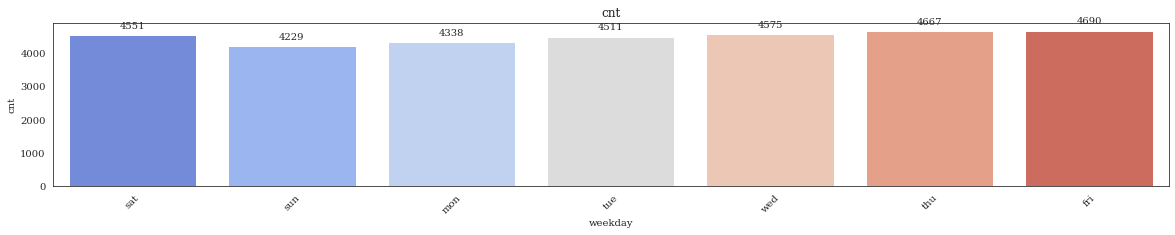

In [11]:
var = df.columns[1:]
for i in var:
    plt.figure(figsize=(20,3))
    try:
        splot = sns.barplot(x='weekday', y=i,  data=df,  ci=None,  capsize=.2, palette='coolwarm')
        plt.title(str(i))
        
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.xticks(rotation=45)
       
    except Exception:
        plt.close()
        pass 

plt.show()
        

Bivariate analysis by weekdays for 'cnt' signifies that most customers turn up in Friday and Saturday 

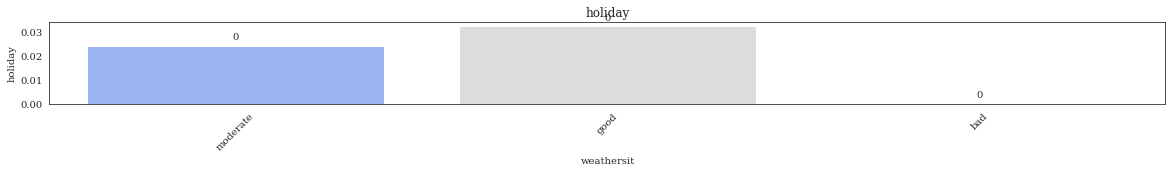

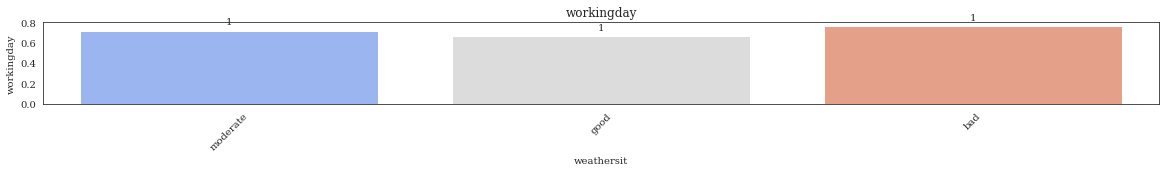

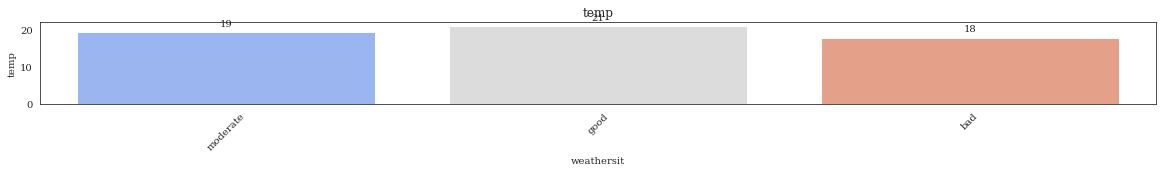

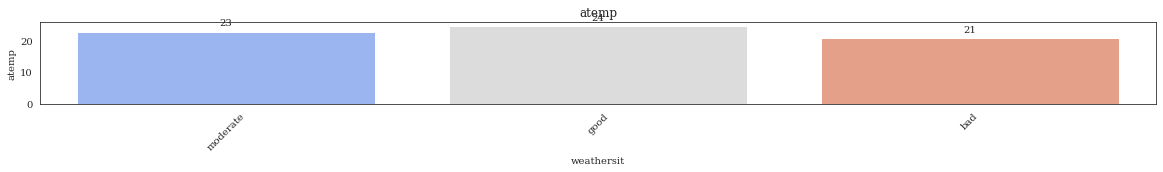

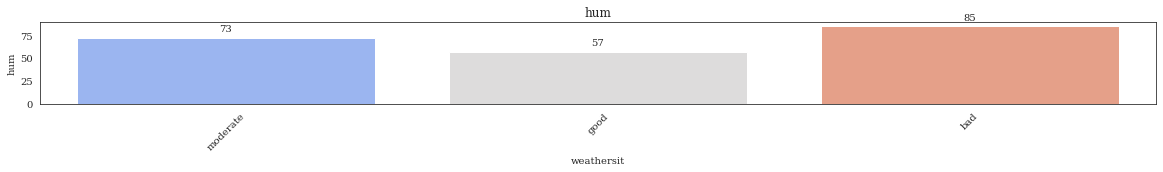

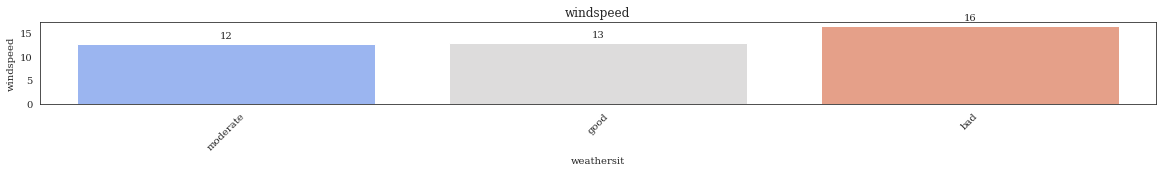

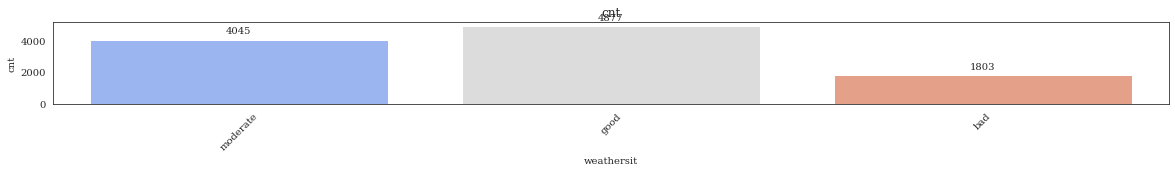

In [12]:
var = df.columns[1:]
for i in var:
    plt.figure(figsize=(20,1.5))
    try:
        splot = sns.barplot(x='weathersit', y=i,  data=df,  ci=None,  capsize=.2, palette='coolwarm')
        plt.title(str(i))
        
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.xticks(rotation=45)
       
    except Exception:
        plt.close()
        pass 

plt.show()

weathersit variable is significant for depend variable, as bad weather does results in poor demand

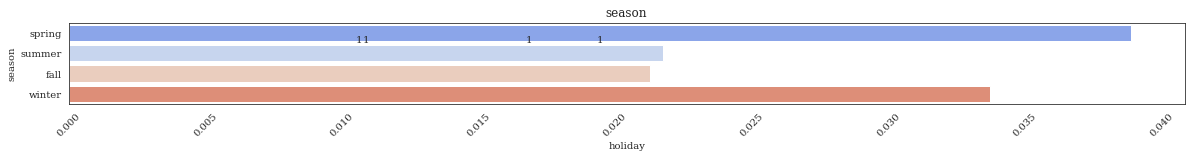

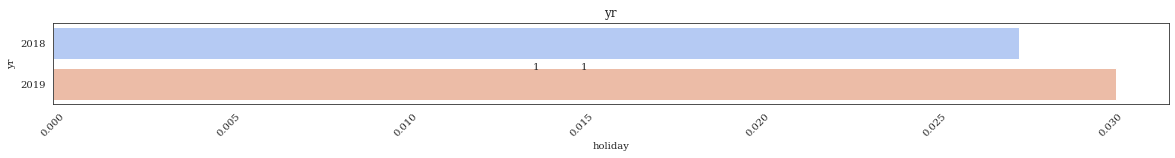

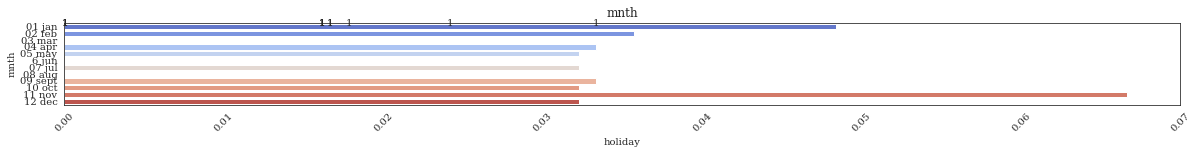

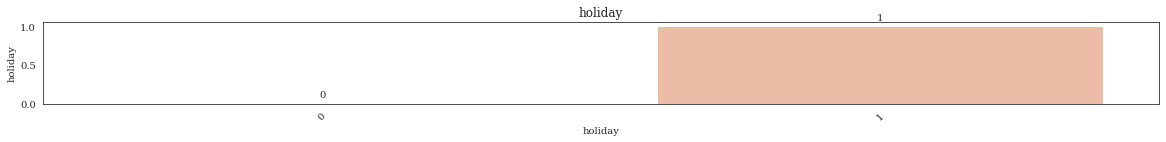

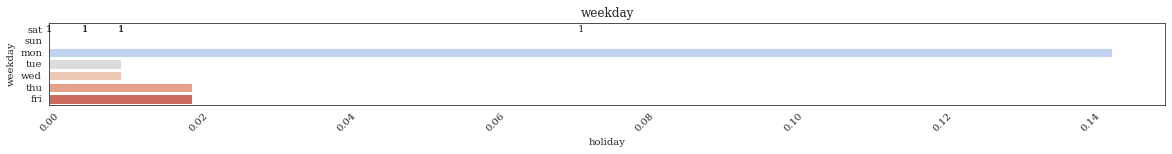

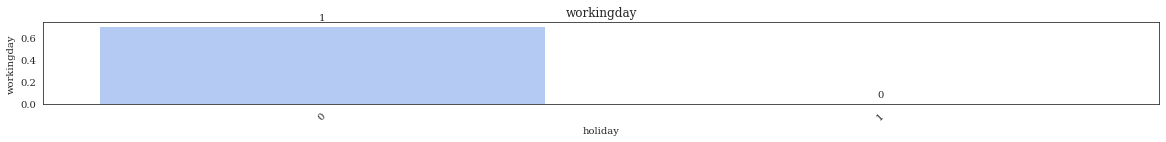

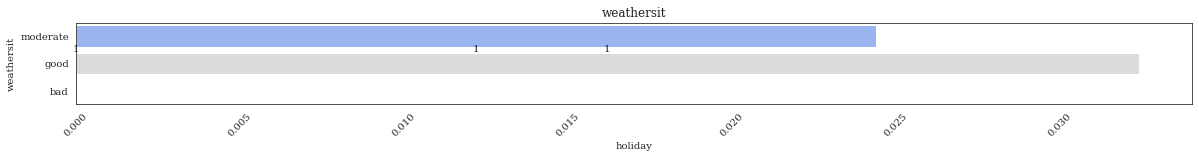

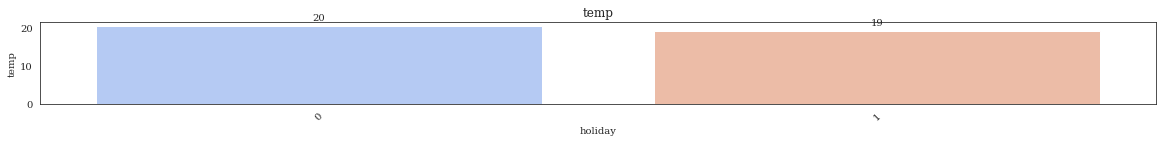

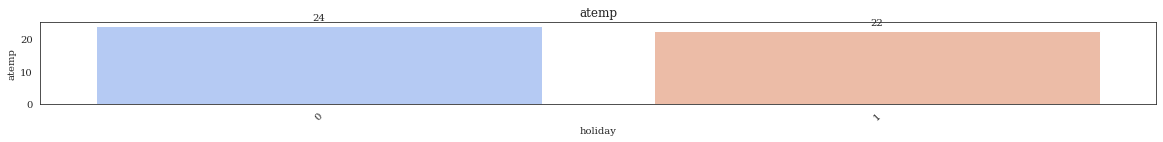

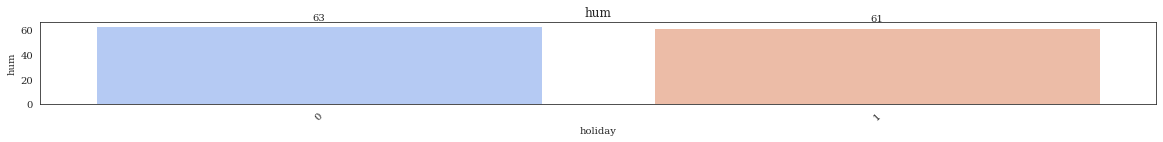

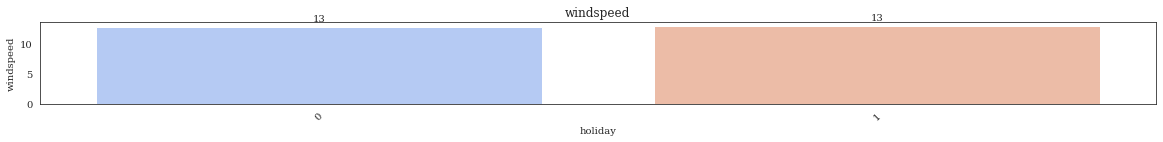

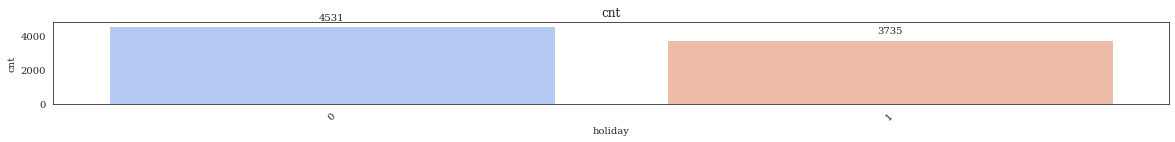

In [13]:
var = df.columns[1:]
for i in var:
    plt.figure(figsize=(20,1.5))
    try:
        splot = sns.barplot(x='holiday', y=i,  data=df,  ci=None,  capsize=.2, palette='coolwarm')
        plt.title(str(i))
        
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.xticks(rotation=45)
       
    except Exception:
        plt.close()
        pass 

plt.show()

holiday didnt realy signifiy any importance. 

## Bivariate analysis by Correlation

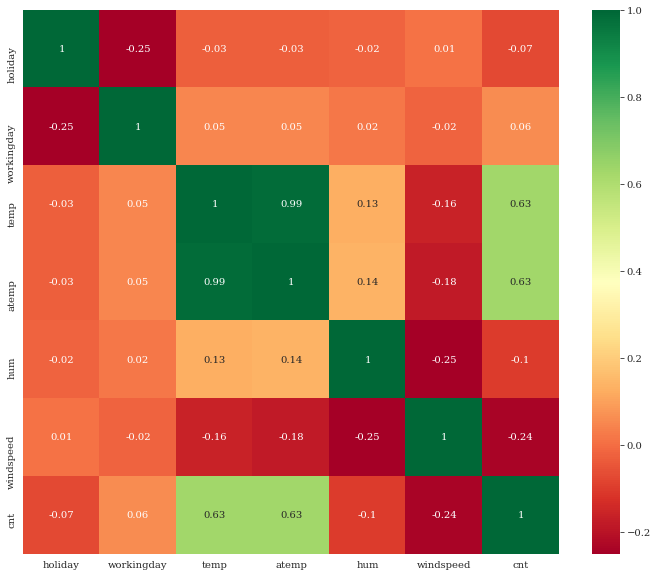

In [14]:
corr_df = df
cor = corr_df.corr().round(2)
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.savefig('correlation.jpeg')
plt.show()

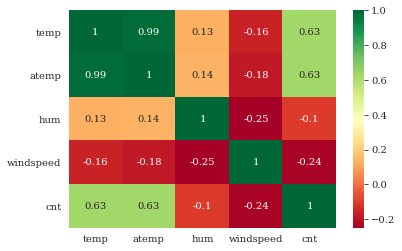

<Figure size 864x720 with 0 Axes>

In [15]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr().round(2), cmap="RdYlGn", annot=True)
plt.figure(figsize=(12,10))
plt.savefig('correlation_reduce.jpeg')
plt.show()


we noticed temp is positive independent varirable , while atemp is duplicating the similar impact.

## Check Error 

In [16]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

we also check if there is any blank data , which requires to be drop or impute

## Pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

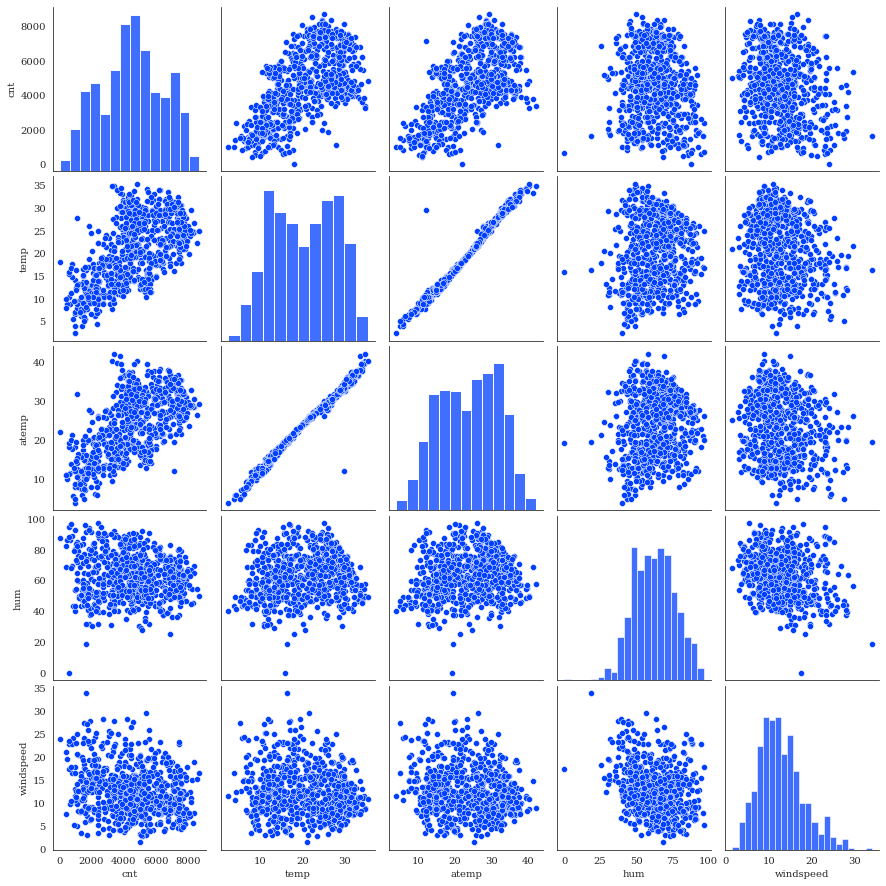

In [17]:
var = ['cnt', 'temp', 'atemp', 'hum','windspeed']
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=var)
plt.show()

the data in scatter analysis for cnt vs temp or atemp is follows are strange line.  

## Analysing Categorical Variable with target variables 

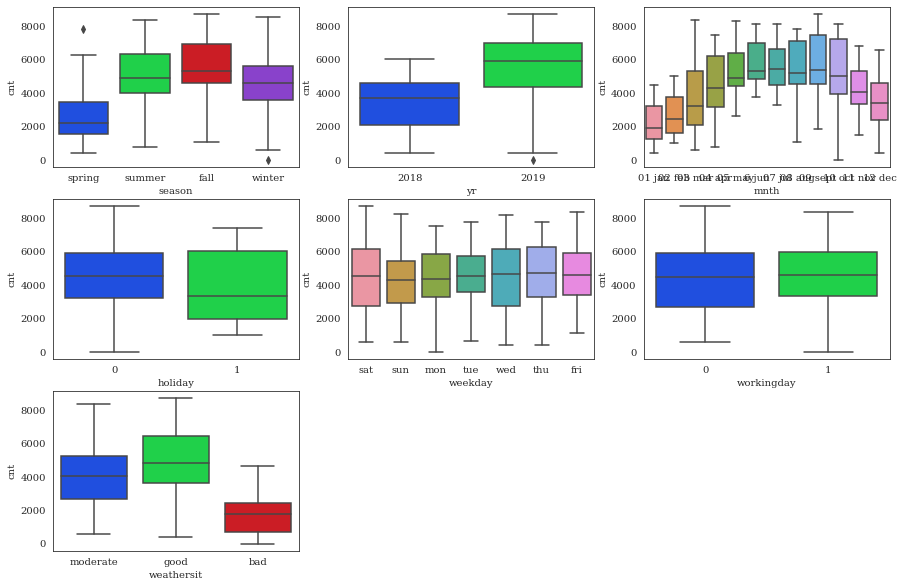

In [18]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 10))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

as mentioned earlier the summer & fall season sees the highest number of customers, in days the Firday and Saturday sees the highest number of customers.Hence there seems to be correlation and strong significance of these as independent variables.

## Multivarite Analysis

In [19]:
def call_analysis(x,y,hue=None, Pr=True):
    
    plt.figure(figsize=(20,4))
    
    try:
        splot = sns.barplot(x=x, y=y, data=df,  capsize=.1, palette='coolwarm', hue=hue, ci=None)
        plt.title(str(x))
        if Pr == True:
            for p in splot.patches:
                splot.annotate(format(p.get_height(), '.0f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', 
                               xytext = (0, 9), 
                               textcoords = 'offset points')
        plt.xticks(rotation=45)
    except Exception:
        plt.close()
        print("Error in Printing")
        pass 

    
    return plt.show()

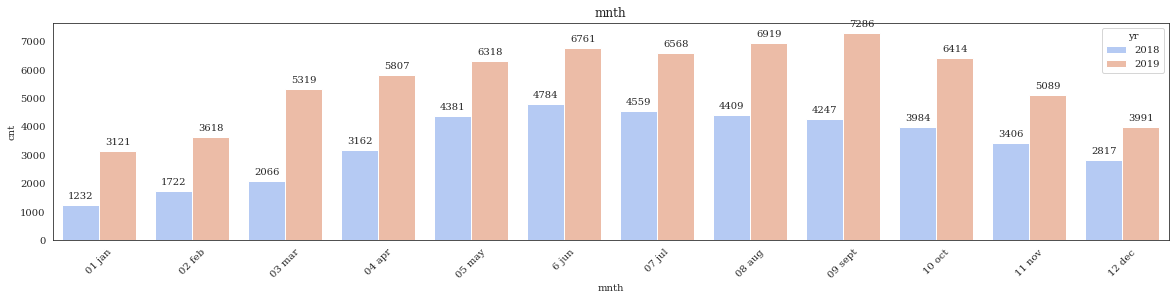

In [20]:
call_analysis('mnth','cnt','yr',Pr=True)

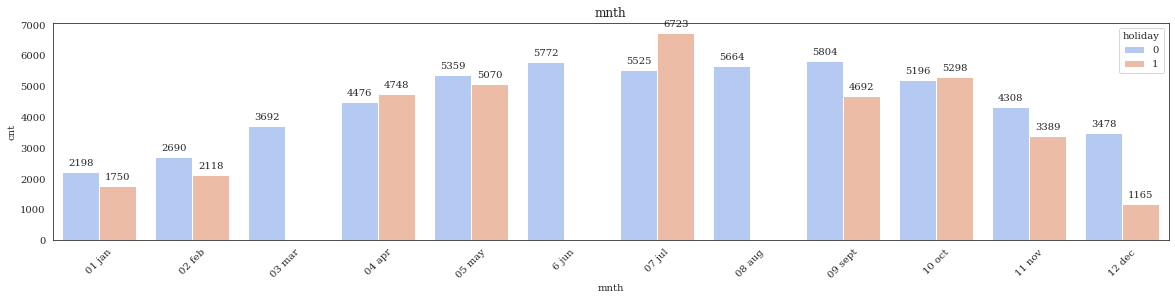

In [21]:
call_analysis('mnth','cnt','holiday',Pr=True)

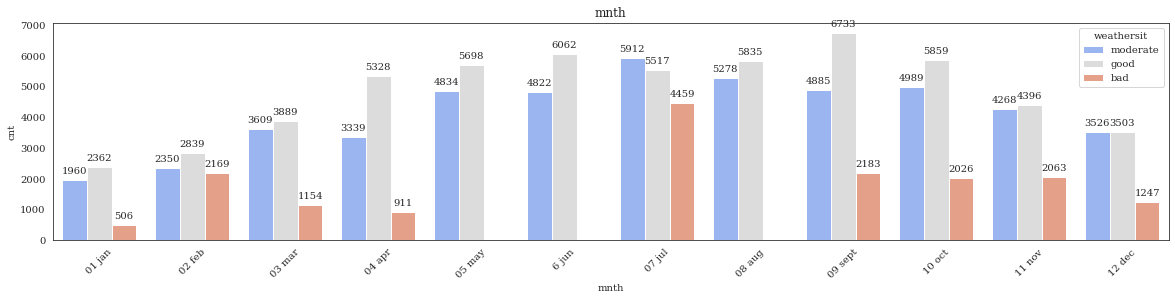

In [22]:
call_analysis('mnth','cnt','weathersit',Pr=True)

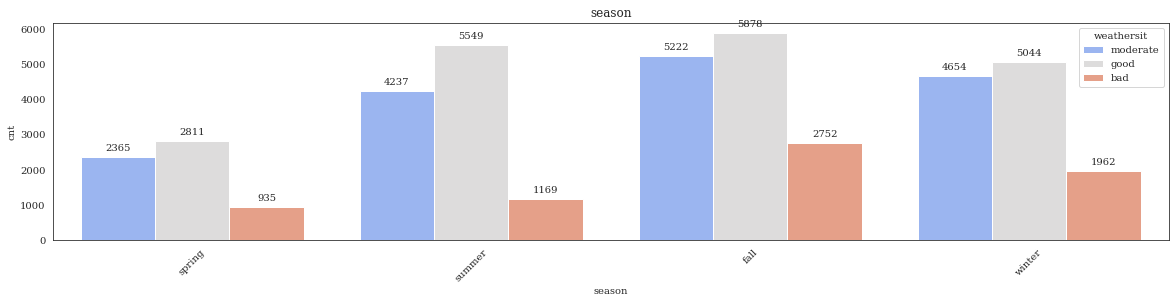

In [23]:
call_analysis('season','cnt','weathersit',Pr=True)

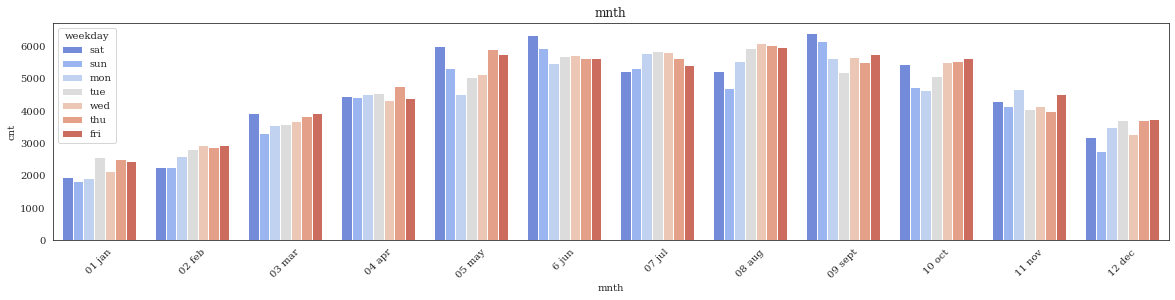

In [24]:
call_analysis('mnth','cnt','weekday',Pr=False)

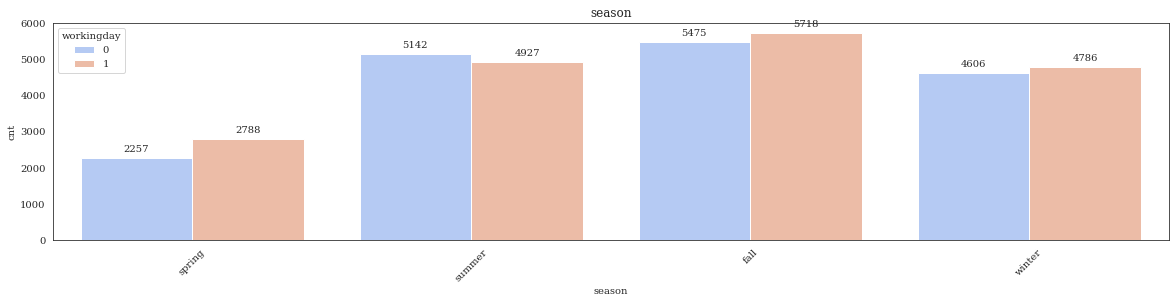

In [25]:
call_analysis('season','cnt','workingday',Pr=True)

## Linear Regression Dummmy Variables

after understanding the data EDA, we started to creates dummpy variables and scalling the data for continues data set. 

In [26]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,01 jan,0,sat,0,moderate,14.11,18.18,80.58,10.75,985
1,02-01-2018,spring,2018,01 jan,0,sun,0,moderate,14.90,17.69,69.61,16.65,801
2,03-01-2018,spring,2018,01 jan,0,mon,1,good,8.05,9.47,43.73,16.64,1349
3,04-01-2018,spring,2018,01 jan,0,tue,1,good,8.20,10.61,59.04,10.74,1562
4,05-01-2018,spring,2018,01 jan,0,wed,1,good,9.31,11.46,43.70,12.52,1600


In [27]:
var =["season","mnth","weekday"]

df = pd.get_dummies(data=df,columns=var,drop_first=True)

In [28]:
df = pd.get_dummies(data=df,columns=["weathersit"])

In [29]:
df.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_02 feb', 'mnth_03 mar', 'mnth_04 apr', 'mnth_05 may',
       'mnth_07 jul', 'mnth_08 aug', 'mnth_09 sept', 'mnth_10 oct',
       'mnth_11 nov', 'mnth_12 dec', 'mnth_6 jun', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
df.head().T

,0,1,2,3,4
dteday,01-01-2018,02-01-2018,03-01-2018,04-01-2018,05-01-2018
yr,2018,2018,2018,2018,2018
holiday,0,0,0,0,0
workingday,0,0,1,1,1
temp,14.11,14.90,8.05,8.20,9.31
atemp,18.18,17.69,9.47,10.61,11.46
hum,80.58,69.61,43.73,59.04,43.70
windspeed,10.75,16.65,16.64,10.74,12.52
cnt,985,801,1349,1562,1600
season_spring,1,1,1,1,1


now we have good clean data after scalling and dummy variables. 

## Train Test Split

In [31]:
y=df.pop('cnt')
df.pop('dteday')
X=df
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, test_size=0.3, random_state=seed)

we create train test split for running regression analysis, we randomize with fix seed.

In [32]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


## Scaling Features

In [33]:
## we will scale non Binary features 

var = ['temp','atemp','hum','windspeed','yr']
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[var] = scaler.fit_transform(X_train[var])

X_test[var] = scaler.transform(X_test[var])

In [34]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
holiday,510.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
workingday,510.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,510.00,0.54,0.23,0.00,0.34,0.54,0.74,1.00
atemp,510.00,0.51,0.21,0.00,0.33,0.53,0.69,1.00
hum,510.00,0.65,0.15,0.00,0.54,0.65,0.75,1.00
windspeed,510.00,0.32,0.17,0.00,0.20,0.30,0.41,1.00
season_spring,510.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
season_summer,510.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00
season_winter,510.00,0.25,0.43,0.00,0.00,0.00,0.00,1.00


## Fit Regression

In [35]:
model = LinearRegression()

## RFE to reduce features

In [36]:
reduce_feature = 15

In [37]:
model_rfe = RFE(model,reduce_feature)
model_rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
list(zip(X_train.columns,model_rfe.support_,model_rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_02 feb', False, 8),
 ('mnth_03 mar', True, 1),
 ('mnth_04 apr', True, 1),
 ('mnth_05 may', True, 1),
 ('mnth_07 jul', False, 16),
 ('mnth_08 aug', True, 1),
 ('mnth_09 sept', True, 1),
 ('mnth_10 oct', False, 2),
 ('mnth_11 nov', False, 12),
 ('mnth_12 dec', False, 13),
 ('mnth_6 jun', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

## Automate the Regression and VIFs

In [39]:
def model(cols):
    X_train_model_regression = sm.add_constant(X_train[cols])
    model_regression = sm.OLS(y_train, X_train_model_regression).fit()
    print(model_regression.summary())
    return model_regression

In [40]:
def vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [41]:
X_train.columns[model_rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_03 mar', 'mnth_04 apr', 'mnth_05 may',
       'mnth_08 aug', 'mnth_09 sept', 'mnth_6 jun', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [42]:
X_train.columns[~model_rfe.support_] # not in the list 

Index(['workingday', 'atemp', 'season_summer', 'mnth_02 feb', 'mnth_07 jul',
       'mnth_10 oct', 'mnth_11 nov', 'mnth_12 dec', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

## Check 1st Model post Automatic RFE reduction 

In [43]:
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_03 mar', 'mnth_04 apr', 'mnth_05 may',
       'mnth_08 aug', 'mnth_09 sept', 'mnth_6 jun', 'weathersit_bad',
       'weathersit_good']

model(cols)
vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.3
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          9.99e-188
Time:                        22:13:10   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2025.9812    324.669     

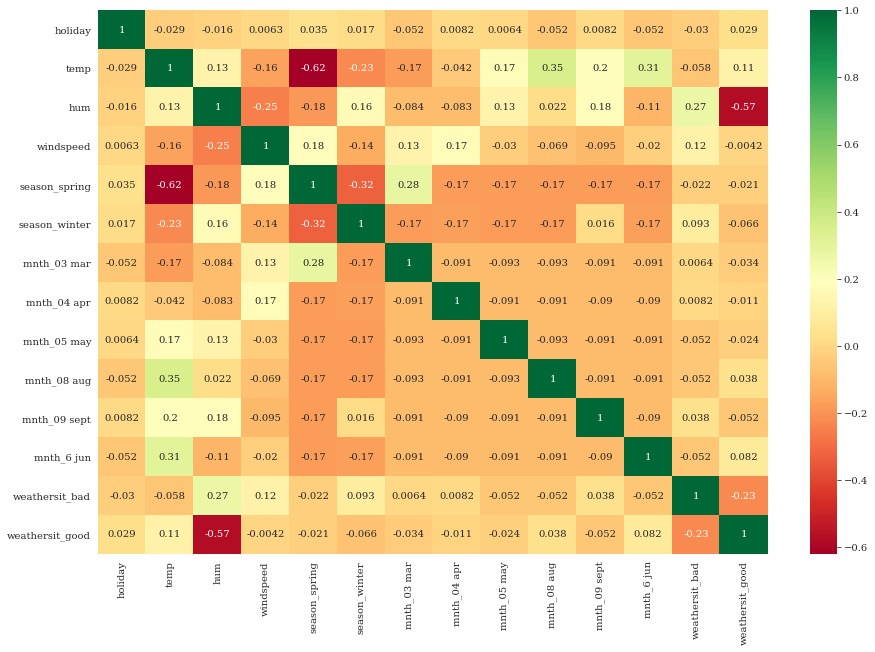

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(df[cols].corr(), cmap='RdYlGn', annot=True)
plt.show()

## Model 2 - after removing High VIF of over 5 except which are important

In [45]:
cols2 = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_winter', 'mnth_03 mar', 'mnth_04 apr', 'mnth_05 may',
       'mnth_08 aug', 'mnth_09 sept', 'mnth_6 jun', 'weathersit_bad',
       'weathersit_good']


model(cols2)
vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          3.23e-185
Time:                        22:13:12   Log-Likelihood:                -4123.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1082.2058    235.185     

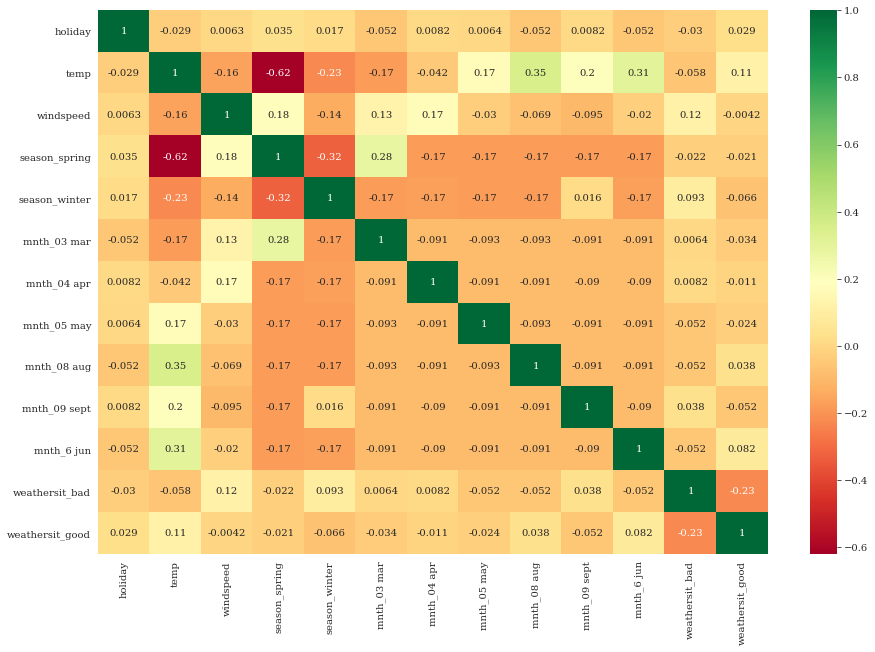

In [46]:
plt.figure(figsize = (15,10))
sns.heatmap(df[cols2].corr(), cmap='RdYlGn', annot=True)
plt.show()

## Additional Model 3 post high p-value of over 0.05 , not required as all the values are less then 0.05 P-value

In [47]:
#Blank

In [48]:
# Blank

## Model Evaluation and Predication 

In [49]:
def SKlearn_model(X,y):
    SKLR = LinearRegression()
    SKLR.fit(X,y)
    return SKLR

In [50]:
SKLR = SKlearn_model(X_train[cols2],y_train)
display(SKLR.intercept_,SKLR.coef_)

1082.205750450075

array([ 2035.44575365,  -772.14561692,  3755.07215675, -1306.84213972,
        -599.86519624,   901.14342442,   550.05342186,   630.61421592,
         750.13146307,   432.54908595,   953.87270327,   519.08404105,
       -1768.08805525,   704.12323511])

In [51]:
y_train_pred = SKLR.predict(X_train[cols2])

In [52]:
r2_score(y_train,y_train_pred)

0.8378907829756002

In [53]:
y_test_pred = SKLR.predict(X_test[cols2])

In [54]:
r2_score(y_test,y_test_pred)

0.8092527702963155

In [55]:
def test_model(cols):
    X_test_model_regression = sm.add_constant(X_test[cols])
    test_model_regression = sm.OLS(y_test, X_test_model_regression).fit()
    print(test_model_regression.summary())
    return test_model_regression

In [56]:
test_model(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     68.78
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           3.40e-69
Time:                        22:13:15   Log-Likelihood:                -1772.5
No. Observations:                 219   AIC:                             3575.
Df Residuals:                     204   BIC:                             3626.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1328.5529    406.292     

### Results and Conclusions
- The Bike Businss should expect higher customers in Summer & Fall, as the Spring have a negative relationship.  
- Similarly, we predict higher turnout in and during September.
- It is highly likely to have drop is sales during bad weather.

We suggest due to COVID19 to assume similar low-turnout as bad weather / off-season, however the management may offer some discounts or offers during the off-season to boost customers turnover. 